#                                        Rendu Partie 1&2 du projet d'Optimisation 

## $- Koussaila$ $KADI$

## $- Mehdi$ $ZENINE$

## $- Nathaniel$ $DAHAN$

## Groupe : $B$

Cette partie du projet comporte plusieurs choses, le notebook avec le code ainsi qu'une application 
que nous continuerons de travailler pour la troisieme partie du projet.

## Phase 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
print('test')

test


<ipython-input-8-27fa22b176e0>:84: UserWarning: The following kwargs were not used by contour: 'nIso'
  plt.contour(x2d,y2d,f(x2d,y2d),nIso=71, cmap = 'rainbow')


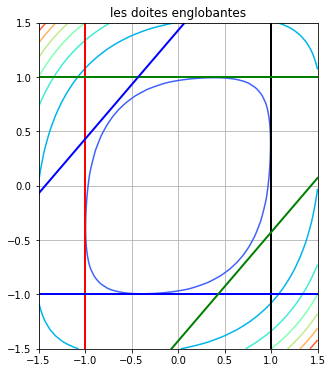

In [8]:
class HQ:
    def __init__(self):
        """
        Cette methode permet le premier trace de la fonction, nous avons pris les donnees 
        de l'exemple du projet pour comparer nos resultats.
        """
        self.k=3
        self.A=[1,0,0.7]
        self.B=[0,1,-0.7]
        self.C=[0,0,0]
        self.G=[5,5,5]
       
# Permet a l'utilisateur de determiner les parametres A, B, C et gamma
    """def getParam(self):
        self.k=int(input('nombre de termes HQ'))
        print('entrer les parametres :Ak,Bk,Ck,Gk')
        L=[[] for i in range(self.k)]
        for i in range(self.k):
            tmp=input('entrer params:')
            L[i]=tmp.split(',')
            L[i]=[float(L[i][j]) for j in range(len(L[i]))] 
        self.Ak=[L[i][0] for i in range(len(L))]
        self.Bk=[L[i][1] for i in range(len(L))]
        self.Ck=[L[i][2] for i in range(len(L))] 
        self.Gk=[L[i][3] for i in range(len(L))]
        print('les paramètres entrées:\n',L)
     """
    # fonction 
    def f(self,x=None,y=None):
        """
        :param: x, y
        :return: ∑|𝐴[k]𝑥+𝐵[k]𝑦+𝐶[k]|^𝜆[k]
        Contour définie par 𝜑(𝑥,𝑦,𝜆) = ∑|𝐴[k]𝑥+𝐵[k]𝑦+𝐶[k]|^𝜆[k]
        """
        s=0
        for i in range (self.k):
            s=s+abs(self.A[i]*x+self.B[i]*y+self.C[i])**self.G[i]
        return s-1  #pour le contour recherché
    
    def f1(self,i):
        return -self.C[i]/self.A[i]-1/self.A[i]
        
    def f2(self,i):
        return -self.C[i]/self.A[i]+1/self.A[i]
        
    def f3(self,x,i):
        return (-self.A[i]/self.B[i])*x-self.C[i]/self.B[i]-1/self.B[i]
        
    def f4(self,x,i):
        return (-self.A[i]/self.B[i])*x-self.C[i]/self.B[i]+1/self.B[i]
    
        
    def Droite_englobantes(self,f,xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5,nx=50,ny=50,figsize=(5,6)):
        """
        :param: fonction, min(x,y), max(x,y), nb(x,y)
        Cette methode permet de tracer les droites englobantes, en utilisant les formules presentes dans le cours 
        nous avons pu determiner les parms de droites pour y en fonction de f1 et f2 et celle en x en fonction de 
        f3 et f4.
        """
        plt.figure(figsize=figsize)
        tab_x = np.linspace(xmin,xmax,nx)
        tab_y = np.linspace(ymin,ymax,nx)
        #--------------------------------
        x1d = np.linspace(xmin,xmax,nx)
        y1d = np.linspace(ymin,ymax,ny)
        x2d, y2d = np.meshgrid(x1d, y1d)
        
        for i in range(self.k):
            # conditions pour y quand Bk≠0 
            if self.B[i]==0 and self.A[i]!=0: 
                try:
                    plt.plot([self.f1(i) ,self.f1(i)],[xmin, xmax], 'r-', lw=2) # Red straight line
                    plt.plot([self.f2(i) ,self.f2(i)],[ymin, ymax], 'k-', lw=2) # Black straight line
                except: pass
                
        for i in range(self.k):
            # conditions pour x quand Bk=0 
            if self.B[i]!=0:
                try:
                    plt.plot([xmin, xmax],[self.f3(xmin,i),self.f3(xmax,i)], 'b-', lw=2) # Blue straight line
                    plt.plot([xmin, xmax],[self.f4(ymin,i),self.f4(ymax,i)], 'g-', lw=2) # Green straight line
                except: pass
        
        plt.contour(x2d,y2d,f(x2d,y2d),nIso=71, cmap = 'rainbow')
        plt.title('les doites englobantes')
        plt.xlim([xmin, xmax])
        plt.ylim([ymin, ymax])
        plt.grid()
    
        
              
hq=HQ()
hq.Droite_englobantes(hq.f)

## Phase 2

## Fitter un nuage de point avec HQ

la fonction pour le fit : $𝝍(𝒙,𝒚,𝒂,𝒃)$ =$(ax-by)^4$ + $(x-y)^4$ -1

la fonction coût: $J(x,y)$=  $\sum_{i=1}^{N}  [(𝝍_{i}(𝒂,𝒃))]^2$   

Pour la methode de descente de gradient ainsi que celle de Newton, nous avons besoin du gradient:

$$\nabla J(a,b) = [\frac{\partial J}{\partial a}(a,b), \frac{\partial J}{\partial b}(a,b)]$$

Egalement de la hessienne pour la methode de Newton:

$$ H_{J}(a,b) = \begin{bmatrix} \frac{\partial^2 f}{\partial x^2}(a,b) & \frac{\partial^2 f}{\partial x\partial y}(a,b) \\ \frac{\partial^2 f}{\partial y\partial x}(a,b) & \frac{\partial^2 f}{\partial y^2}(a,b) \end{bmatrix}$$


---------------
Gradient descent:
---------------
a_ini=0.5 , b_ini= -0.5
a_final=0.8034596958153021 , b_final= -0.3737120387829174
Nombre iter=407
valeur final J =0.2953396398103118
----------------


<ipython-input-8-27fa22b176e0>:84: UserWarning: The following kwargs were not used by contour: 'nIso'
  plt.contour(x2d,y2d,f(x2d,y2d),nIso=71, cmap = 'rainbow')



---------------
Newton:
---------------
a_ini=0.2 , b_ini= -0.7
a_final=0.7296628351303887 , b_final= -0.4396035362810259
Nombre iter=1000
valeur final J =0.455440653193298
test


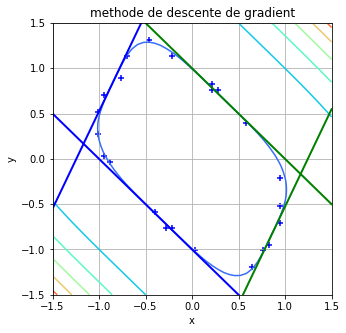

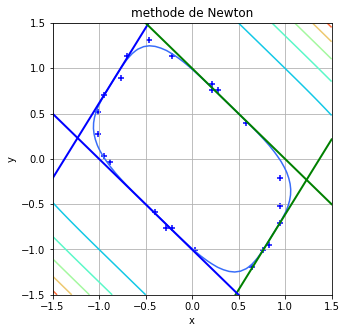

In [9]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog


class FitData(HQ):
    def __init__(self):
        super().__init__()
        self.x=[]
        self.y=[] 
        self.a=None
        self.b=None
    
    def app(self):
        """
        Cette methode permet d'avoir une IHM pour acceder au fichier .csv contenant le nuage de points (x,y)
        """
        root= tk.Tk()
        canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
        canvas1.pack()
        browseButton_CSV = tk.Button(text=" Import CSV File ", command=self.getCSV, bg='green',fg='white', font=('helvetica', 12, 'bold'))
        canvas1.create_window(150, 150, window=browseButton_CSV)
        root.mainloop()
        
    def getCSV(self):
        """
        Cette methode recupere les donnees x,y pour les stockees dans les variables du meme nom
        """
        x,y=[],[]
        import_file_path = filedialog.askopenfilename()
        file=open(import_file_path)
        data=csv.reader(file)
        for i,row in enumerate(data):
            if i==0: x=row
            else:    y=row
        self.x=np.asarray([float(i) for i in x])
        self.y=np.asarray([float(i) for i in y])
        
        
    def plotData(self):
        plt.figure(figsize=(5,5))
        plt.scatter(self.x,self.y,marker='+',c='b')
        plt.title('data scatter')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()  
        
    #---------------------------------------------
    def w(self,x=None,y=None):
        s=(self.a*x+self.b*y)**4+(x+y)**4-1
        return s
    
    def J(self,a,b):
        s=0
        for i in range(len(self.x)):
               s=s+((a*self.x[i]+b*self.y[i])**4+(self.x[i]+self.y[i])**4-1)**2
        return s
    
    
    # methode de gradient: 
    def Gradient_descent(self,a=0.5,b=-0.5,itermax=1000):
        """
        :param: a_initial, b_initial et le nombre d'iterations maximum
        :return: a_final, b_final
        """
        a_ini=a
        b_ini=b
        alpha=0.001
        iter=0
        eps=10e-6
        sa=sb=1
        while  (abs(sa)>eps or abs(sb)>eps) and iter<itermax :#self.J(a,b)>0.3:
            sa,sb=0,0
            for i in range(len(self.x)):
                sa+=8*self.x[i]*((a*self.x[i]+b*self.y[i])**3)*((a*self.x[i]+b*self.y[i])**4+(self.x[i]+self.y[i])**4-1)
                sb+=8*self.y[i]*((a*self.x[i]+b*self.y[i])**3)*((a*self.x[i]+b*self.y[i])**4+(self.x[i]+self.y[i])**4-1)
            a=a-alpha*sa
            b=b-alpha*sb
            iter+=1
        self.a=a
        self.b=b
        self.A=[a,1]
        self.B=[b,1]
        self.C=[0,0]
        self.k=2
        mes='\n---------------\nGradient descent:\n---------------\n'
        mes+='a_ini={} , b_ini= {}\n'.format(a_ini,b_ini)
        mes+='a_final={} , b_final= {}\n'.format(a,b)
        mes+='Nombre iter={}\n'.format(iter)
        mes+='valeur final J ={}'.format(self.J(a,b))
        print(mes)
        
        """
        Un des points importants 
        """
    
    # methode de Newton
    def Newton(self,a=0.2,b=-0.7,itermax=1000):
        """
        :param: a_initial, b_initial et le nombre d'iterations maximum
        :return: a_final, b_final
        Nous avons calcule a la main le gradient ainsi que la hessienne qui nous permettrons d'implementer la methode de Newton.
        """
        a_ini=a
        b_ini=b
        dX=1 #longueur du déplacement
        eps = 10e-6
        iter=0
        d1a,d1b,d2a,d2b,d2ab=0,0,0,0,0
        X = np.array([[a],[b]])
        while dX>eps and  iter<itermax:
            for i in range(len(self.x)):
                a=X[0][0]
                b=X[1][0]
                d1a+=8*self.x[i]*((a*self.x[i]+b*self.y[i])**3)*((a*self.x[i]+b*self.y[i])**4+(self.x[i]+self.y[i])**4-1)
                d1b+=8*self.y[i]*((a*self.x[i]+b*self.y[i])**3)*((a*self.x[i]+b*self.y[i])**4+(self.x[i]+self.y[i])**4-1)
                d2a+=32*self.x[i]**2*(a*self.x[i]+b*self.y[i])**6 + 24*self.x[i]**2*(a*self.x[i]+b*self.y[i])**2*((a*self.x[i]+b*self.y[i])**4 + (self.x[i]+self.y[i]**4)-1)
                d2b+=32*self.y[i]**2*(a*self.x[i]+b*self.y[i])**6 + 24*self.x[i]**2*(a*self.x[i]+b*self.y[i])**2*((a*self.x[i]+b*self.y[i])**4 + (self.x[i]+self.y[i]**4)-1)
                d2ab+= 32*self.x[i]*self.y[i]**2*(a*self.x[i]+b*self.y[i])**6 + 24*self.x[i]**2*(a*self.x[i]+b*self.y[i])**2*((a*self.x[i]+b*self.y[i])**4 + (self.x[i]+self.y[i]**4)-1)
            Grad = np.array([[d1a],[d1b]])
            Hess = np.array([[d2a,d2ab],[d2ab,d2b]])
            deltaX =np.dot(np.linalg.inv(Hess),-Grad)
            X += deltaX
            dX = np.linalg.norm(deltaX)
    
            iter+=1
        """if dX <= eps:
            print("converge")
        else:
            print("diverge")"""
        self.a=X[0][0]
        self.b=X[1][0]
        self.A=[self.a,1]
        self.B=[self.b,1]
        self.C=[0,0]
        self.k=2
        mes='\n---------------\nNewton:\n---------------\n'
        mes+='a_ini={} , b_ini= {}\n'.format(a_ini,b_ini)
        mes+='a_final={} , b_final= {}\n'.format(self.a,self.b)
        mes+='Nombre iter={}\n'.format(iter)
        mes+='valeur final J ={}'.format(self.J(self.a,self.b))
        print(mes)
        
        """
        Nous avons pu remarquer que le choix du point de depart pour la methode de Newton est un critere important.
        En effet si l'on choisit mal ce point, c'est a dire que x0 est loin de x∞ pourrait conduire a une divergeance.
        Dans la pratique, nous n'avons pas de moyens de savoir a quelle point x0 est proche de x∞, c'est un des inconvenient de 
        cette methode.
        """
        
    def graph(self, name):
        self.Droite_englobantes(f=self.w,xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5,nx=50,ny=50,figsize=(5,5))
        plt.scatter(self.x,self.y,marker='+',c='b')
        plt.title(str(name))
        plt.xlabel('x')
        plt.ylabel('y')
    
           
data=FitData()
data.app()

#data.getData()
#data.plotData()
data.Gradient_descent()
data.graph("methode de descente de gradient")
print('----------------')
data.Newton()
data.graph("methode de Newton")
print("test")

La matrice lambda des paramètre est:  [[-0.01440724  0.0065749  -0.47074585]
 [-0.00739563 -0.01322267  1.47721693]
 [ 0.01546063  0.00993875 -1.43500705]]
test


<Figure size 432x288 with 0 Axes>

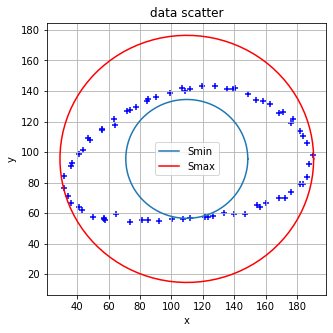

<Figure size 432x288 with 0 Axes>

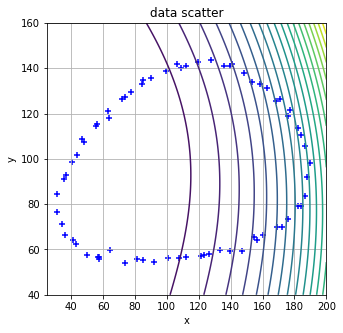

In [27]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import filedialog
import numpy as np
from sympy import symbols
from sympy import sqrt,Matrix
import sympy as sy
from numpy import linalg


class Phase3(FitData):
    def __init__(self):
        super().__init__()
       
    
    def initialise_coefHQ(self) : #On prend Nh=3
        self.getCSV()
        x_pts, y_pts, N=self.x,self.y,3
        """ Initialise les parametres de l'HQ 
    
        Un jeu de paramètres est déterminé à partir d'un polygone entourant le nuage de points.
        NB : ne fonctionne correctement que pour N >= 3
        
        Parameters
        ----------
        x_pts, y_pts: tables de float, coordonnees du nuage de points a fitter
        N: entier, nombre de termes de l'HQ à fitter
        
        Returns
        -------
        param_ini : table de float de dimension (N,4), paramètres pour initialiser le fit de l'HQ
        
        """
        # 1) Calcul du centre de gravite et des distances max et min
        xG, yG = np.mean(x_pts), np.mean(y_pts)
        dMax = 2 * np.sqrt( np.max( (x_pts - xG)**2 + (y_pts - yG)**2 ) )
        pad = 0.1 * dMax    # Marge pour s'assurer que les droites incluent tous les points

        i, piN = np.arange(N), np.pi / N
        R = ( dMax / 2 + pad ) / np.cos( piN )  # Rayon du cercle circonscrit au polygone
        D = 1.5 * ( dMax + pad )                # Distance entre les droites d'une paire
        # Definition des N sommets d'un polygone
        ptsPoly = np.zeros( (2, N + 1) )
        ptsPoly[0, :N] = xG + R * np.cos( (2 * i + 1) * piN )
        ptsPoly[1, :N] = yG + R * np.sin( (2 * i + 1) * piN )
        ptsPoly[0, -1], ptsPoly[1, -1] = ptsPoly[0, 0], ptsPoly[1, 0]
        # Definition de N points sur les lignes paralleles
        ptsPar = np.zeros( (2, N) )
        ptsPar[0, :] = xG - (D - R) * np.cos( 2 * (i+1) * piN )
        ptsPar[1, :] = yG - (D - R) * np.sin( 2 * (i+1) * piN )

        # Calcul des coefficients
        Det = ptsPoly[0, i] * ptsPoly[1, i+1]   - ptsPoly[0, i] * ptsPar[1, i] +    \
            ptsPar[0, i] * ptsPoly[1, i]    - ptsPar[0, i] * ptsPoly[1, i+1] +  \
            ptsPoly[0, i+1] * ptsPar[1, i]  - ptsPoly[0, i+1] * ptsPoly[1, i]

        param_ini = np.zeros((N, 4))
        param_ini[i, 0] = 2 * ( ptsPoly[1, i+1] - ptsPoly[1, i] ) / Det
        param_ini[i, 1] = 2 * ( ptsPoly[0, i] - ptsPoly[0, i+1] ) / Det
        param_ini[i, 2] = ( ptsPoly[0, i+1] * ptsPar[1, i]   - ptsPoly[0, i] * ptsPoly[1, i+1] +   \
                         ptsPar[0, i]    * ptsPoly[1, i]  - ptsPoly[0, i] * ptsPar[1, i] +      \
                         ptsPoly[0, i+1] * ptsPoly[1, i]  - ptsPar[0, i]  * ptsPoly[1, i+1] ) / Det
        param_ini[i, 3] = 4
    
        return param_ini
    
    
    
    
    
    def Fio(self,A,B,C,i):
        s=0
        Nh=len(A)
        for k in range(Nh):
            s+=(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**4
        return s**0.25
    
    
    
    
    def Eof1(self,A,B,C):
        N=len(self.x)
        Nh=len(A)
        s=0
        u=0
        for i in range (N):
            s=self.Fio(A,B,C,i)
            u+=(1-s)**2
        return 0.5*u
    
    
    
    
    def d(self,i):
        n=1-self.Fio(A,B,C,i)
        s=self.Fio(A,B,C,i)**(-3)
        Nh=len(A)
        s1,s2=0,0
        for k in range(Nh):
            s1+= A[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3 
            s2+= B[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3   
        d1=s*s1
        d2=s*s2
        d=[d1,d2]
        d=np.linalg.norm(d)
        return n/d
    
        
    def Eof2(self):
        N=len(self.x)
        s=0
        for i in range (N):
            s+=self.d(i)**2
        return 0.5*s
    
    
    #Définie Smin et Smax
    def couronneNuage(self):
        xc, yc = np.mean(self.x), np.mean(self.y)  # coordonnées du centre du nuage
        smin, smax = np.inf, 0           # rayons minimal et maximal

        for u, v in zip(self.x, self.y):
            dist = np.sqrt((u-xc)**2 + (v-yc)**2)
            smin = min(smin, dist)
            smax = max(smax, dist)

        return smin, smax
    
    
    
    
    def Pk(self,A,B,C):
        k1,k2,s=10,10,0
        Nh=len(A)
        b=[]
        Smin,Smax=self.couronneNuage()
        for k in range (Nh):
            u1=(2/(k1*Smax))**2
            u2=(2/(k2*Smin))**2
            m1=u1-(A[k]**2+B[k]**2)
            m2=(A[k]**2+B[k]**2)-u2
            s+=max(0,m1)**2+max(0,m2)**2
        return s 
    
    
    
    #définition de circle 
    def circle(self,smin,smax): 
        xc, yc = np.mean(self.x), np.mean(self.y)  # coordonnées du centre du nuage
        theta=np.linspace(0,2*np.pi,100)
        x1=smin*np.cos(theta)
        y1=smin*np.sin(theta)
        x2=smax*np.cos(theta)
        y2=smax*np.sin(theta)
        
        x1+=xc
        y1+=yc
        #plt.figure()
        plt.plot(x1,y1,label='Smin')
        x2+=xc
        y2+=yc
        plt.plot(x2,y2,'r',label='Smax')
        plt.legend()

    def Eof(self,A,B,C):
        v=10**8
        s=self.Eof2()+v*self.Pk(self,A,B,C)
        return s
    
    
    def J(self,A,B,C):
        i=0
        s=self.Fio(A,B,C,i)**(-3)
        Nh,N=len(A),len(self.x)
        s1,s2=0,0
        w=[0]*N
        for i in range (N):
            for k in range(Nh):
                s1+= A[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3 
                s2+= B[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3   
            d1=s*s1
            d2=s*s2
            d=[d1,d2]
            d=np.linalg.norm(d)**2
            #w.append(1/d)
            w[i]=float(1/d)
        p=0
        for i in range (N):
            p+=w[i]*(1-self.Fio(A,B,C,i))**2
        p=p*0.5
        for i in range(N):
            p+=10**8*self.Pk(A,B,C)
        return p
    
 


    def derivee(self,f):
        a1,b1,c1,a2,b2,c2,a3,b3,c3,x,y = symbols('a1 b1 c1 a2 b2 c2 a3 b3 c3 x y') 
        f = sy.sympify(f)
        print("J(x)= {}".format(f)) 
  
        # 1 ere dérivée: 
        d1fa1 = sy.diff(f, a1)
        d1fb1 = sy.diff(f, b1)
        d1fc1 = sy.diff(f, c1)
        d1fa2 = sy.diff(f, a2)
        d1fb2 = sy.diff(f, b2)
        d1fc2 = sy.diff(f, c2)
        d1fa3 = sy.diff(f, a3)
        d1fb3 = sy.diff(f, b3)
        d1fc3 = sy.diff(f, c3)
        
        d1L=[d1fa1,d1fb1,d1fc1,d1fa2,d1fb2,d1fc2,d1fa3,d1fb3,d1fc3]
        print('J\'(x,y)=: {}'.format(d1L))
        
        # convertir en fonction
        d1fa1=sy.lambdify(a1,d1fa1)
        d1fb1=sy.lambdify(b1,d1fb1)
        d1fc1=sy.lambdify(c1,d1fc1)
        d1fa2=sy.lambdify(a2,d1fa2)
        d1fb2=sy.lambdify(b2,d1fb2)
        d1fc2=sy.lambdify(c2,d1fc2)
        d1fa3=sy.lambdify(a3,d1fa3)
        d1fb3=sy.lambdify(b3,d1fb3)
        d1fc3=sy.lambdify(c3,d1fc3)
        d1f=[d1fa1,d1fb1,d1fc1,d1fa2,d1fb2,d1fc2,d1fa3,d1fb3,d1fc3]
        
        
        
        """d1fx=Matrix((d1fa,d1fb,d1fc))
        # 2ème dérivée
        d2faa= sy.diff(f,a,a)
        d2fbb= sy.diff(f,b,b)
        d2fcc= sy.diff(f,c,c)
        d2L=[d2faa,d2fbb,d2fcc]
        print('J\'\'(x,y)= {}'.format(d2L)) 
    
        # convertir en fonction
        d1fa=sy.lambdify(a,d1fa)
        d1fb=sy.lambdify(b,d1fb)
        d1fc=sy.lambdify(c,d1fc)
        d1f=[d1fa,d1fb,d1fc]
        
        d2faa=sy.lambdify(a,d2faa)
        d2fbb=sy.lambdify(b,d2fbb)
        d2fcc=sy.lambdify(c,d2fcc)
        d2f=[d2faa,d2fbb,d2fcc] """
        
        print("**fin de calcul de derivées 1 ordre et 2eme ordre ***")
        return d1f,d1L
    
    #Smin,Smax=self.couronneNuage()
    
    #u1=(2/(10*Smax))**2
    #u2=(2/(10*Smin))**2
    def gradJ(self,A,B,C,i):
        s=self.Fio(A,B,C,i)**(-3)
        Nh,N=len(A),len(self.x)
        s1,s2=0,0
        w=[0]*N
        for i in range (N):
            for k in range(Nh):
                s1+= A[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3 
                s2+= B[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3   
            d1=s*s1
            d2=s*s2
            d=[d1,d2]
            d=np.linalg.norm(d)**2
            #w.append(1/d)
            w[i]=float(1/d)
        Smin,Smax=self.couronneNuage()
        u1=(2/(10*Smax))**2
        u2=(2/(10*Smin))**2
        pa1=A[0]*(-max(0,u1-(A[0]**2+B[0]**2))+max(0,-u2+(A[0]**2+B[0]**2)))
        pa2=A[1]*(-max(0,u1-(A[1]**2+B[1]**2))+max(0,-u2+(A[1]**2+B[1]**2)))
        pa3=A[2]*(-max(0,u1-(A[2]**2+B[2]**2))+max(0,-u2+(A[2]**2+B[2]**2)))
        pb1=B[0]*(-max(0,u1-(A[0]**2+B[0]**2))+max(0,-u2+(A[0]**2+B[0]**2)))
        pb2=B[1]*(-max(0,u1-(A[1]**2+B[1]**2))+max(0,-u2+(A[1]**2+B[1]**2)))
        pb3=B[2]*(-max(0,u1-(A[2]**2+B[2]**2))+max(0,-u2+(A[2]**2+B[2]**2)))
        pc1=0
        pc2=0
        pc3=0
        p=[[] for i in range(9)]
        
        p[0]=pa1
        p[1]=pb1
        p[2]=pc1
        p[3]=pa2
        p[4]=pb2
        p[5]=pc2
        p[6]=pa3
        p[7]=pb3
        p[8]=pc3
        p =np.asarray(p).T
        
        
        s=0
        for i in range(N):
            d1fa1=-8*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fb1=-8*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fc1=-8*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fa2=8*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fb2=8*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fc2=8*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fa3=8*self.x[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fb3=8*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            d1fc3=8*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)
            J=[[] for i in range(9)]
            
            J[0]=d1fa1
            J[1]=d1fb1
            J[2]=d1fc1
            J[3]=d1fa2
            J[4]=d1fb2
            J[5]=d1fc2
            J[6]=d1fa3
            J[7]=d1fb3
            J[8]=d1fc3
            J =np.asarray(J).T
            #J=np.array([J[0],J[1],J[2],J[3],J[4],J[5],J[6],J[7],J[8]])
            #J=float(J)
            s+=w[i]*J
        s=0.5*s+(10**8)*p
        return s

    def Hessienne(self,A,B,C):
            ss,i=0,0
            s=self.Fio(A,B,C,i)**(-3)
            Nh,N=len(A),len(self.x)
            s1,s2=0,0
            w=[0]*N
            for i in range (N):
                for k in range(Nh):
                    s1+= A[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3 
                    s2+= B[k]*(A[k]*self.x[i]+B[k]*self.y[i]+C[k])**3
                d1=s*s1
                d2=s*s2
                d=[d1,d2]
                d=np.linalg.norm(d)**2
                #w.append(1/d)
                w[i]=float(1/d)


            for i in range(N):
                x=self.x[i]
                y=self.y[i]
                a1,a2,a3=A[0],A[1],A[2]
                b1,b2,b3=B[0],B[1],B[2]
                c1,c2,c3=C[0],C[1],C[2]
                #H1=np.asarray([[[32*x**2*(a1*x + b1*y + c1)**6 - 24*x**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3]], [[32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a1*x + b1*y + c1)**6 - 24*y**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a1*x + b1*y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3]], [[32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a1*x + b1*y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a1*x + b1*y + c1)**6 - 24*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3]], [[-32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x**2*(a2*x + b2*y + c2)**6 + 24*x**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a2*x + b2*y + c2)**6 + 24*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3]], [[-32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x*y*(a2*x + b2*y + c2)**6 + 24*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a2*x + b2*y + c2)**6 + 24*y**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3]], [[-32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a2*x + b2*y + c2)**6 + 24*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3]], [[-32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x**2*(a3*x + b3*y + c3)**6 + 24*x**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)]], [[-32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a3*x + b3*y + c3)**6 + 24*y**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)]], [[-32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a3*x + b3*y + c3)**6 + 24*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)]]])
                #H1=[[[32*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), -32*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**6 - 24*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[-32*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, 32*self.x[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.x[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[-32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.y[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[-32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, -32*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3, 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**6 + 24*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3]], [[-32*self.x[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]**2*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.x[i]**2*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.x[i]*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.x[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.x[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)]], [[-32*self.x[i]*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]**2*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]**2*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.x[i]*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]**2*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.y[i]**2*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)]], [[-32*self.x[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*self.y[i]*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, -32*(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.y[i]*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*(A[1]*self.x[i] + B[1]*self.y[i] + C[1])**3*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**3, 32*self.x[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.x[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*self.y[i]*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1), 32*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**6 + 24*(A[2]*self.x[i] + B[2]*self.y[i] + C[2])**2*(-(A[0]*self.x[i] + B[0]*self.y[i] + C[0])**4 + (A[1]*self.x[i] + B[1]*self.y[i] + C[1])**4 + (A[2]*self.x[i] + B[2]*self.y[i] + C[2])**4 + 1)]]]
                #H1=[[[32*x**2*(a1*x + b1*y + c1)**6, - 24*x**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)  ,32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)  ,32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)  ,-32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3,  -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3,  -32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3  ,-32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3] [32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y**2*(a1*x + b1*y + c1)**6 - 24*y**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y*(a1*x + b1y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 ,-32*y**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3] [32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y*(a1*x + b1*y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*(a1*x + b1*y + c1)**6 - 24*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y  3)**3 , -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3] [-32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , 32*x**2*(a2*x + b2*y + c2)**6 + 24*x**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*y*(a2*x + b2*y + c2)**6 + 24*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3] [-32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , 32*x*y*(a2*x + b2*y + c2)**6 + 2*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y**2*(a2*x + b2*y + c2)**6 + 24*y**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3] [-32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3 , 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1),  32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*(a2*x + b2*y + c2)**6 + 24*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3] [-32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3  ,32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3  ,32*x**2*(a3*x + b3*y + c3)**6 + 24*x**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)] [-32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*y**2*(a1*x + b1*y + c1)**3*(a3*x  3*y + c3)**3 , -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y**2*(a3*x + b3*y + c3)**6 + 24*y**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)] [-32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3 , 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3,  32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3 , 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1) , 32*(a3*x + b3*y + c3)**6 + 24*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)]]]
                H1=[[32*x**2*(a1*x + b1*y + c1)**6 - 24*x**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3], [32*x*y*(a1*x + b1*y + c1)**6 - 24*x*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a1*x + b1*y + c1)**6 - 24*y**2*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a1*x + b1*y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3], [32*x*(a1*x + b1*y + c1)**6 - 24*x*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a1*x + b1*y + c1)**6 - 24*y*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a1*x + b1*y + c1)**6 - 24*(a1*x + b1*y + c1)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3], [-32*x**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x**2*(a2*x + b2*y + c2)**6 + 24*x**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a2*x + b2*y + c2)**6 + 24*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3], [-32*x*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x*y*(a2*x + b2*y + c2)**6 + 24*x*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a2*x + b2*y + c2)**6 + 24*y**2*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3], [-32*x*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*y*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, -32*(a1*x + b1*y + c1)**3*(a2*x + b2*y + c2)**3, 32*x*(a2*x + b2*y + c2)**6 + 24*x*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a2*x + b2*y + c2)**6 + 24*y*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a2*x + b2*y + c2)**6 + 24*(a2*x + b2*y + c2)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3], [-32*x**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x**2*(a3*x + b3*y + c3)**6 + 24*x**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)], [-32*x*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y**2*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y**2*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*y*(a3*x + b3*y + c3)**6 + 24*x*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y**2*(a3*x + b3*y + c3)**6 + 24*y**2*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)], [-32*x*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*y*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, -32*(a1*x + b1*y + c1)**3*(a3*x + b3*y + c3)**3, 32*x*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*y*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*(a2*x + b2*y + c2)**3*(a3*x + b3*y + c3)**3, 32*x*(a3*x + b3*y + c3)**6 + 24*x*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*y*(a3*x + b3*y + c3)**6 + 24*y*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1), 32*(a3*x + b3*y + c3)**6 + 24*(a3*x + b3*y + c3)**2*(-(a1*x + b1*y + c1)**4 + (a2*x + b2*y + c2)**4 + (a3*x + b3*y + c3)**4 + 1)]]
                ss+=w[i]*np.asarray(H1)
            ss=0.5*ss
            #Hessienne de la pénalité
            Smin,Smax=self.couronneNuage()
            u1=(2/(10*Smax))**2
            u2=(2/(10*Smin))**2
            pa1a1=4*(-max(0,u1-(A[0]**2+B[0]**2))+max(0,-u2+(A[0]**2+B[0]**2)))+8*(A[0]**2)*(np.sign(max(0,u1-(A[0]**2+B[0]**2)))+np.sign(max(0,-u2+(A[0]**2+B[0]**2))))
            pa2a2=4*(-max(0,u1-(A[1]**2+B[1]**2))+max(0,-u2+(A[1]**2+B[1]**2)))+8*(A[1]**2)*(np.sign(max(0,u1-(A[1]**2+B[1]**2)))+np.sign(max(0,-u2+(A[1]**2+B[1]**2))))
            pa3a3=4*(-max(0,u1-(A[2]**2+B[2]**2))+max(0,-u2+(A[2]**2+B[2]**2)))+8*(A[2]**2)*(np.sign(max(0,u1-(A[2]**2+B[2]**2)))+np.sign(max(0,-u2+(A[2]**2+B[2]**2))))

            pb1b1=4*(-max(0,u1-(A[0]**2+B[0]**2))+max(0,-u2+(A[0]**2+B[0]**2)))+8*(B[0]**2)*(np.sign(max(0,u1-(A[0]**2+B[0]**2)))+np.sign(max(0,-u2+(A[0]**2+B[0]**2))))
            pb2b2=4*(-max(0,u1-(A[1]**2+B[1]**2))+max(0,-u2+(A[1]**2+B[1]**2)))+8*(B[1]**2)*(np.sign(max(0,u1-(A[1]**2+B[1]**2)))+np.sign(max(0,-u2+(A[1]**2+B[1]**2))))
            pb3b3=4*(-max(0,u1-(A[2]**2+B[2]**2))+max(0,-u2+(A[2]**2+B[2]**2)))+8*(B[2]**2)*(np.sign(max(0,u1-(A[2]**2+B[2]**2)))+np.sign(max(0,-u2+(A[2]**2+B[2]**2))))

            pa1b1=8*(A[0]*B[0])*(np.sign(max(0,u1-(A[0]**2+B[0]**2)))+np.sign(max(0,-u2+(A[0]**2+B[0]**2))))
            pa2b1=8*(A[1]*B[0])*(np.sign(max(0,u1-(A[1]**2+B[0]**2)))+np.sign(max(0,-u2+(A[1]**2+B[0]**2))))
            pa3b1=8*(A[2]*B[0])*(np.sign(max(0,u1-(A[2]**2+B[0]**2)))+np.sign(max(0,-u2+(A[2]**2+B[0]**2))))
            pa1b2=8*(A[0]*B[1])*(np.sign(max(0,u1-(A[0]**2+B[1]**2)))+np.sign(max(0,-u2+(A[0]**2+B[1]**2))))
            pa2b2=8*(A[1]*B[1])*(np.sign(max(0,u1-(A[1]**2+B[1]**2)))+np.sign(max(0,-u2+(A[1]**2+B[1]**2))))
            pa3b2=8*(A[2]*B[1])*(np.sign(max(0,u1-(A[2]**2+B[1]**2)))+np.sign(max(0,-u2+(A[2]**2+B[1]**2))))
            pa1b3=8*(A[0]*B[2])*(np.sign(max(0,u1-(A[0]**2+B[2]**2)))+np.sign(max(0,-u2+(A[0]**2+B[2]**2))))
            pa2b3=8*(A[1]*B[2])*(np.sign(max(0,u1-(A[1]**2+B[2]**2)))+np.sign(max(0,-u2+(A[1]**2+B[2]**2))))
            pa3b3=8*(A[2]*B[2])*(np.sign(max(0,u1-(A[2]**2+B[2]**2)))+np.sign(max(0,-u2+(A[2]**2+B[2]**2))))

            H2=np.zeros((9,9))
            H2[0,0],H2[0,1],H2[0,2],H2[0,3],H2[0,4],H2[0,5],H2[0,6],H2[0,7],H2[0,8]=pa1a1,pa1b1,0,0,pa1b2,0,0,pa1b3,0
            H2[1,0],H2[1,1],H2[1,2],H2[1,3],H2[1,4],H2[1,5],H2[1,6],H2[1,7],H2[1,8]=pa1b1,pb1b1,0,pa2b1,0,0,pa3b1,0,0
            H2[2,0],H2[2,1],H2[2,2],H2[2,3],H2[2,4],H2[2,5],H2[2,6],H2[2,7],H2[2,8]=0,0,0,0,0,0,0,0,0
            H2[3,0],H2[3,1],H2[3,2],H2[3,3],H2[3,4],H2[3,5],H2[3,6],H2[3,7],H2[3,8]=0,pa2b1,0,pa2a2,pa2b2,0,0,pa2b3,0
            H2[4,0],H2[4,1],H2[4,2],H2[4,3],H2[4,4],H2[4,5],H2[4,6],H2[4,7],H2[4,8]=pa1b2,0,0,pa2b2,pb2b2,0,pa3b2,0,0
            H2[5,0],H2[5,1],H2[5,2],H2[5,3],H2[5,4],H2[5,5],H2[5,6],H2[5,7],H2[5,8]=0,0,0,0,0,0,0,0,0
            H2[6,0],H2[6,1],H2[6,2],H2[6,3],H2[6,4],H2[6,5],H2[6,6],H2[6,7],H2[6,8]=0,pa3b1,0,0,pa3b2,0,pa3a3,pa3b3,0
            H2[7,0],H2[7,1],H2[7,2],H2[7,3],H2[7,4],H2[7,5],H2[7,6],H2[7,7],H2[7,8]=pa1b3,0,0,pa2b3,0,0,pa3b3,pb3b3,0
            H2[8,0],H2[8,1],H2[8,2],H2[8,3],H2[8,4],H2[8,5],H2[8,6],H2[8,7],H2[8,8]=0,0,0,0,0,0,0,0,0

            return ss+H2


                
    
        
    def LM(self):
        lam=self.initialise_coefHQ()
        eps,n=10**(-6),0
        dlam,b=1,0.01
        nmax=30
        N=len(self.x)
        A=lam[:,0]
        B=lam[:,1]
        C=lam[:,2]
        while (dlam>eps) and (n<nmax):
            dj=self.gradJ(A,B,C,0)
            H=self.Hessienne(A,B,C)
            #while(self.J(A1,B1,C1)>=self.J(A,B,C)):
            g=np.zeros((9,9))
            for i in range(9):
                g[i,i]=1
            G=H+b*g
            Gi=-np.linalg.inv(G)
            deltalam= np.matmul(Gi,dj)
            deltalam=np.reshape(deltalam,(3,3))
            lam1=lam[0:3,0:3]+deltalam
            A1=lam1[:,0]
            B1=lam1[:,1]
            C1=lam1[:,2]
            while(self.J(A1,B1,C1)>=self.J(A,B,C)):
                b*=10
                G=H+b*g
                Gi=-np.linalg.inv(G)
                deltalam= np.matmul(Gi,dj)
                deltalam=np.reshape(deltalam,(3,3))
                lam1=lam[0:3,0:3]+deltalam
                A1=lam1[:,0]
                B1=lam1[:,1]
                C1=lam1[:,2]
                
            b*=0.1
            #lam=lam[0:3,0:3]
            lam=lam[0:3,0:3]+deltalam
            dlam=np.linalg.norm(deltalam)
            n+=1
        return lam
    

                
            
    
        
         
            
    
phase3=Phase3()
lam=phase3.initialise_coefHQ()
#print(lam)
plt.figure()
phase3.plotData() #Data Scatter
smin,smax=phase3.couronneNuage()
phase3.circle(smin,smax)
lam=phase3.LM() #Renvoie lambda sous forme de matrice 3x3 contenant les élements Ak,Bk et Ck (Nh=3)
print("La matrice lambda des paramètre est: ",lam)
A=lam[:,0]
B=lam[:,1]
C=lam[:,2]
phase3.A=lam[:,0]
phase3.B=lam[:,1]
phase3.C=lam[:,2]

def f(x,y):
    s=0
    for i in range (3):
        s=s+abs(A[i]*x+B[i]*y+C[i])**4
    return s



#phase3.graph("levenberg marquardt")
xmin, xmax, nx = 25,200, 4410
tab_x = np.linspace(xmin,xmax,nx)
ymin, ymax, ny = 40, 160, 4410
tab_y = np.linspace(ymin,ymax,nx)


x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de f1
nIso = 21

print("test")
plt.figure()
phase3.plotData()
plt.contour(x2d,y2d,f(x2d,y2d),nIso)

### Résultats obtenues

On remarque que bien que le critère de minimisation ait été amélioré, on obtient une moins bonne approximation avec la méthode de Levenberg‐Marquardt, on peut expliquer ceci par:

-Erreurs de calcules sur la matrice hessienne

-Nombre de termes de l'hyperquadrique insuffisent (Nh=3)

-Le terme $alpha_k=4$ n'est pas forcément adapté pour certains types de fit 


### Conclusions

-La méthode de Levenberg‐Marquardt (LM) est une combinaison des méthodes de newton et du gradien, grâce au paramètre beta qui permet de savoir si on est proche de la solution et donc la quelle des 2 méthodes on doit utiliser 

-La méthode LM peut être compliquée à mettre en oeuvre à cause des calcules conséquents mi en oeuvre dans l'algorithme

-La méthode LM nécessite des outils de calcules importants

-En pratique on doit utiliser cette méthode avec des logiciels de calcules formels pour assurer le bon déroulement de l'algorithme

-Le choix du nombre de terme minimal (Nh=3) pour l'hyperquadrique n'est pas forcément optimal

# Remarque Programme 

**Pour la phase 2**: 
-l'utilisation devra introduire le fichier cvs correspondant aux données des phases 1 et 2

- **Une interface graphique à éte mise en oeuvre et envoyée à notre chargé de TP pour l'examination des phases 1 et 2**

**Pour la phase 3**: l'utilisation devra introduire **2fois** le fichier cvs correspondant aux données qu'il souhaite fitter
(2 fois le même fichier csv)